<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    number_matrices = len(X)
    sum_products = 0.0
    for i in range(number_matrices):
        sum_products += X[i] @ V[i]
    
    return sum_products

# Тесты

In [4]:
def test1():
    matrices = [np.arange(4,13).reshape(3,3), np.array([[1,2,3], [2,5,6], [6,7,4]])]
    vectors = [np.array([1,2,3]), np.array([4,7,2])]
    sum_products = sum_prod(matrices, vectors)

    assert np.array_equal(sum_products, [56, 105, 149]), "Тест 1 не пройден"
    print('Тест 1 пройден')

test1()

def test2():
    matrices = [np.arange(1,10).reshape(3,3), np.array([[0.5, 0.3, 0.1], [0.2, 0.4, 0.6], [0.9, 0.7, 0.8]]), 
                np.array([[15, 18, 13], [40, 74, 0], [4, 32, 4]])]
    vectors = [np.array([1,2,3]), np.array([0.5, 0.7, 0.9]), np.array([20, 0, 12])]
    sum_products = sum_prod(matrices, vectors)

    assert np.array_equal(sum_products, [470.55, 832.92, 179.66]), "Тест 2 не пройден"
    print('Тест 2 пройден')

test2()

Тест 1 пройден
Тест 2 пройден


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
def binarize(M, threshold=0.5):
    new_matrix = np.zeros((len(M), len(M[0])))
    new_matrix[M > threshold] = 1
    
    return new_matrix

# Тесты

In [6]:
def test1():
    matrix = np.array([[0.1, 0.7, 0.3],
                        [0.6, 0.4, 0.9],
                        [0.2, 0.8, 0.5]])
    
    bin_matrix = binarize(matrix)
    
    expected_res = np.array([[0, 1, 0],
                            [1, 0, 1],
                            [0, 1, 0]])
    
    assert np.array_equal(bin_matrix, expected_res), "Тест 1 не пройден"
    print('Тест 1 пройден')

test1()

def test2():
    matrix = np.array([[0.1, 0.7, 0.3],
                        [0.6, 0.4, 0.9],
                        [0.2, 0.8, 0.5]])
    threshold = 0
    
    bin_matrix = binarize(matrix, threshold)
    
    expected_res = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]])
    
    assert np.array_equal(bin_matrix, expected_res), "Тест 2 не пройден"
    print('Тест 2 пройден')
    

test2()

Тест 1 пройден
Тест 2 пройден


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [7]:
def unique_rows(mat):
    unique_elements = []
    for row in mat:
        unique_elements.extend(np.unique(row))
        
    return unique_elements

def unique_columns(mat):
    transponsed_matrix = np.transpose(mat)
    unique_elements = []
    for row in transponsed_matrix:
        unique_elements.extend(np.unique(row))
    
    return unique_elements

# Тесты

In [8]:
def test_rows_1():
    matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [1, 2, 3]])
    
    res = unique_rows(matrix)

    assert np.array_equal(res, [1, 2, 3, 4, 5, 6, 1, 2, 3]), "Тест 1 для строк не пройден"
    print('Тест 1 для строк пройден')

test_rows_1()

def test_rows_2():
    matrix = np.array([[1, 1, 1],
                   [2, 2, 2],
                   [3, 3, 3]])
    
    res = unique_rows(matrix)

    assert np.array_equal(res, [1, 2, 3]), "Тест 2 для строк не пройден"
    print('Тест 2 для строк пройден')

test_rows_2()

def test_columns_1():
    matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [1, 2, 3]])
    
    res = unique_columns(matrix)

    assert np.array_equal(res, [1, 4, 2, 5, 3, 6]), "Тест 1 для столбцов не пройден"
    print('Тест 1 для столбцов пройден')

test_columns_1()

def test_columns_2():
    matrix = np.array([[1, 1, 1],
                   [2, 2, 2],
                   [3, 3, 3]])
    
    res = unique_columns(matrix)

    assert np.array_equal(res, [1, 2, 3, 1, 2, 3, 1, 2, 3]), "Тест 2 для столбцов не пройден"
    print('Тест 2 для столбцов пройден')

test_columns_2()

Тест 1 для строк пройден
Тест 2 для строк пройден
Тест 1 для столбцов пройден
Тест 2 для столбцов пройден


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [9]:
def fill_matrix(m, n):
    matrix = np.random.normal(size=(m, n))
    row_mat_expectation = np.mean(matrix, axis=1)
    column_mat_expectation = np.mean(matrix, axis=0)
    row_dispersion = np.var(matrix, axis=1)
    column_dispersion = np.var(matrix, axis=0)

    for i in range(m):
        plt.hist(matrix[i], label=f"Строка {i + 1}")
    plt.title('Гистограммы для строк')
    plt.legend()
    plt.show()

    transponsed_matrix = np.transpose(matrix)
    for i in range(n):
        plt.hist(transponsed_matrix[i], label=f"Столбец {i + 1}")
    plt.title('Гистограммы для столбцов')
    plt.legend()
    plt.show()

    return matrix, row_mat_expectation, column_mat_expectation, row_dispersion, column_dispersion


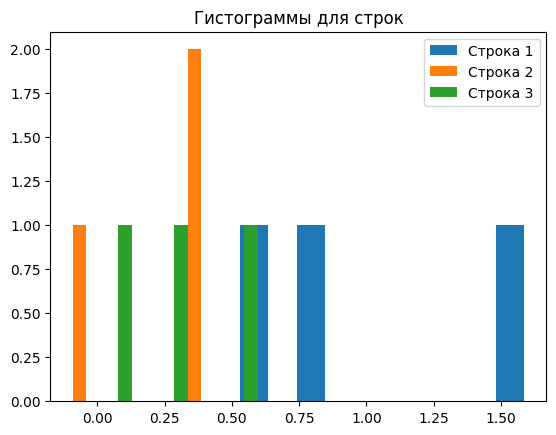

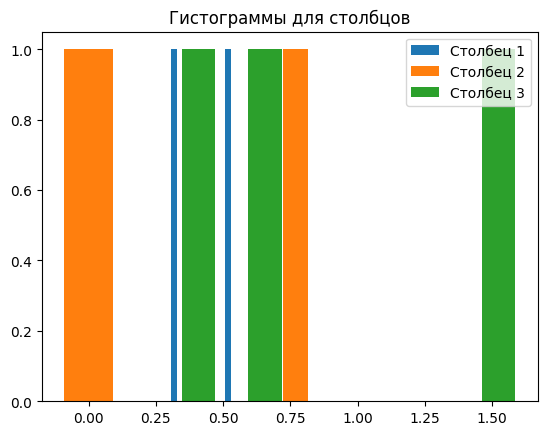

Матрица:
[[ 0.5301687   0.81431119  1.58583397]
 [ 0.38640958 -0.09031734  0.34552104]
 [ 0.30694532  0.07510088  0.59859856]]
Мат ожидания строк: [0.97677128 0.21387109 0.32688159]
Мат ожидания столбцов: [0.4078412  0.26636491 0.84331786]
Дисперии строк: [0.19893483 0.04654395 0.0458737 ]
Дисперсии столбцов: [0.00853444 0.15468309 0.28633979]


In [10]:

matrix, row_mat_expectation, column_mat_expectation, row_dispersion, column_dispersion = fill_matrix(3, 3)

print(f"Матрица:\n{matrix}")
print(f"Мат ожидания строк: {row_mat_expectation}")
print(f"Мат ожидания столбцов: {column_mat_expectation}")
print(f"Дисперии строк: {row_dispersion}")
print(f"Дисперсии столбцов: {column_dispersion}")


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [11]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b
    
    return matrix

# Тесты

In [12]:
def test1():
    matrix = chess(3, 3, 1, 2)
    expected_matrix = np.array([[1, 2, 1], [2, 1, 2], [1, 2, 1]])

    assert np.array_equal(matrix, expected_matrix), "Тест 1 не пройден"
    print('Тест 1 пройден')

test1()

def test2():
    matrix = chess(4, 2, 5, 0)
    expected_matrix = np.array([[5, 0], [0, 5], [5, 0], [0, 5]])

    # print(f"test 2: {np.array_equal(matrix, expected_matrix)}")
    assert np.array_equal(matrix, expected_matrix), "Тест 2 не пройден"
    print('Тест 2 пройден')

test2()

Тест 1 пройден
Тест 2 пройден


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [19]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3)) * background_color

    x1, y1 = (n - a) // 2, (m - b) // 2
    x2, y2 = x1 + a, y1 + b

    image[y1:y2, x1:x2] = rectangle_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3)) * background_color

    y, x = np.ogrid[:m, :n]
    ellipse = ((x - n // 2) / a)**2 + ((y - m // 2) / b)**2 <= 1
    image[ellipse] = ellipse_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Тесты

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


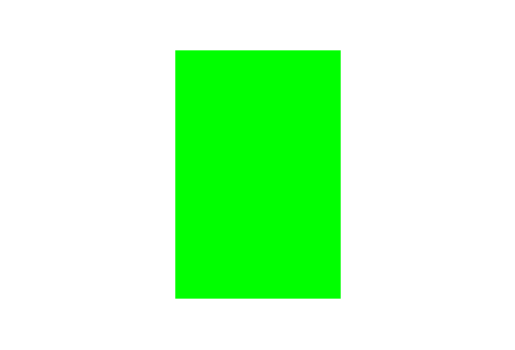

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


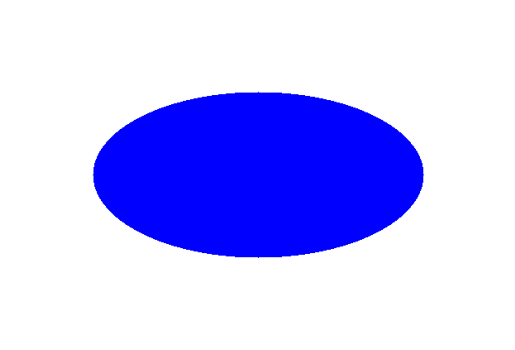

In [20]:
background_color = (255, 255, 255)  # Белый
rectangle_color = (0, 128, 0) # Зеленый
ellipse_color = (0, 0, 255) # Синий

draw_rectangle(200, 300, 400, 600, rectangle_color, background_color)
draw_ellipse(200, 100, 400, 600, ellipse_color, background_color)

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [27]:
def calculate_values(numbers):
    mean = np.mean(numbers)
    variance = np.var(numbers)
    std_deviation = np.std(numbers)
    
    local_maximum = np.where((numbers[1:-1] > numbers[:-2]) & (numbers[1:-1] > numbers[2:]))[0] + 1
    local_minimum = np.where((numbers[1:-1] < numbers[:-2]) & (numbers[1:-1] < numbers[2:]))[0] + 1

    return mean, variance, std_deviation, local_maximum, local_minimum
    

# Тесты

In [37]:


def test():
    numbers = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])
    mean, variance, std_deviation, local_maximum, local_minimum = calculate_values(numbers)

    print("Математическое ожидание:", mean)
    print("Дисперсия:", variance)
    print("Стандартное отклонение:", std_deviation)
    print("Локальные максимумы:", local_maximum)
    print("Локальные минимумы:", local_minimum)

test()

Математическое ожидание: 2.7777777777777777
Дисперсия: 1.7283950617283952
Стандартное отклонение: 1.314684396244359
Локальные максимумы: [4]
Локальные минимумы: []


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [39]:
def one_hot_encoding(v):
    num_classes = len(v)
    max_value = max(v) + 1

    matrix = np.zeros((max_value, num_classes))

    for i, label in enumerate(v):
        matrix[i][label] = 1

    return matrix

# Тесты

In [40]:
def test():
    v = np.array([0, 2, 3, 0])
    result = one_hot_encoding(v)
    expected = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]])

    assert np.array_equal(result, expected), 'Тест не пройден'
    print('Тест пройден')

test()

Тест пройден
